In [10]:
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import torchvision.datasets as datasets
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F

plt.rcParams['figure.figsize'] = (8, 8)

In [11]:
data_dir = './Person_dataset'

# TODO: Define transforms for the training data and testing data
transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(64),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform = transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform = transforms)

train_load = torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=20, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


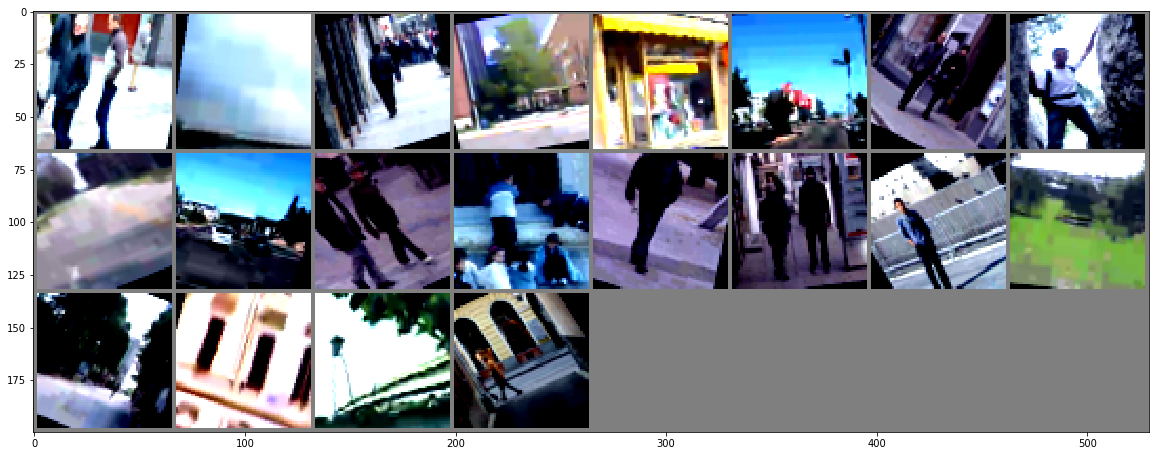

In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_load)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [13]:
print('here {} images'.format(len(train_data)))
print('here {} images'.format(len(test_data)))
print('here {} batches'.format(len(train_load)))
print('here {} batches'.format(len(test_load)))

here 1300 images
here 500 images
here 65 batches
here 25 batches


In [14]:
def cross_entropy(y, y_hat, eps=1e-7):
    return -(y * (y_hat + eps).log()).mean()

def accuracy(a, b):
    return (a == b).float().mean()





  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

epoch 0, train loss 0.31, train acc 0.86, test loss 0.83, test acc 0.58


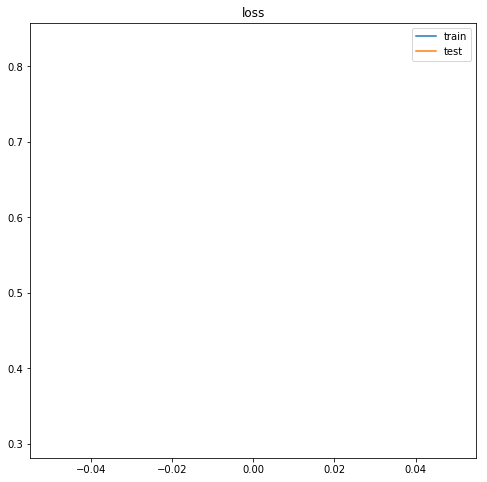

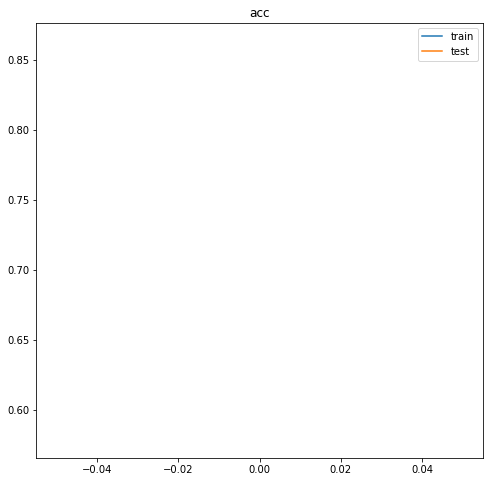





  2%|█▌                                                                              | 1/50 [04:27<3:38:42, 267.80s/it]

epoch 1, train loss 0.19, train acc 0.93, test loss 0.83, test acc 0.52


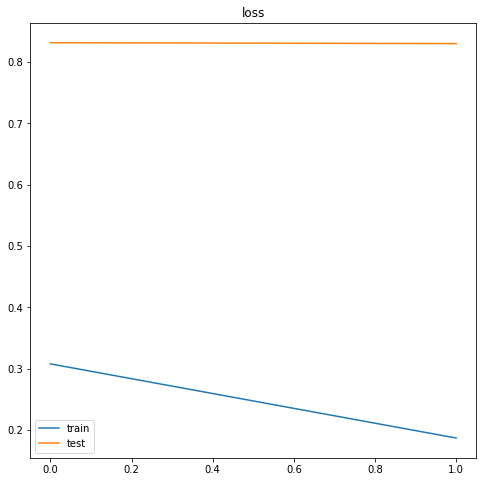

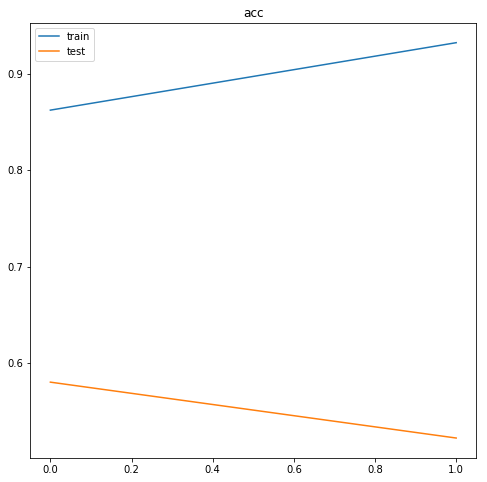





  4%|███▏                                                                            | 2/50 [08:53<3:33:47, 267.24s/it]

epoch 2, train loss 0.16, train acc 0.94, test loss 0.81, test acc 0.45


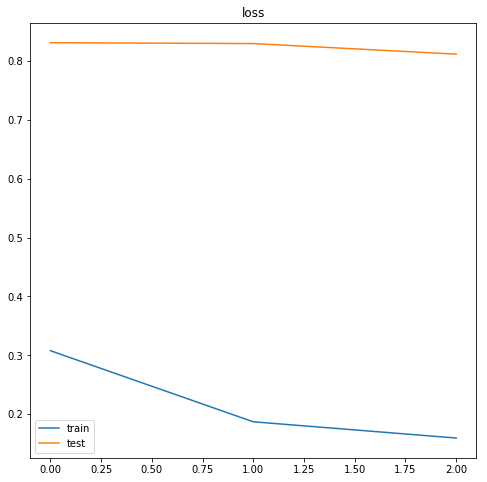

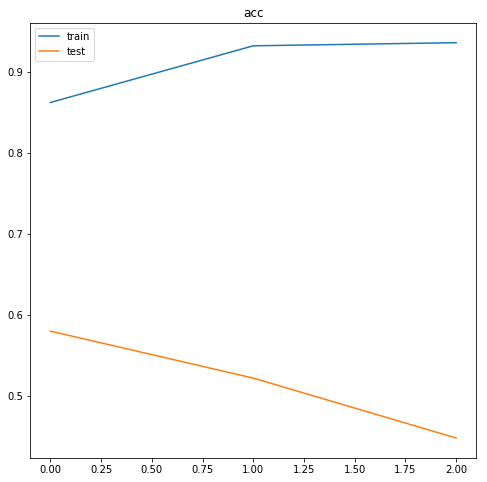





  6%|████▊                                                                           | 3/50 [13:21<3:29:32, 267.50s/it]

epoch 3, train loss 0.16, train acc 0.94, test loss 0.88, test acc 0.50


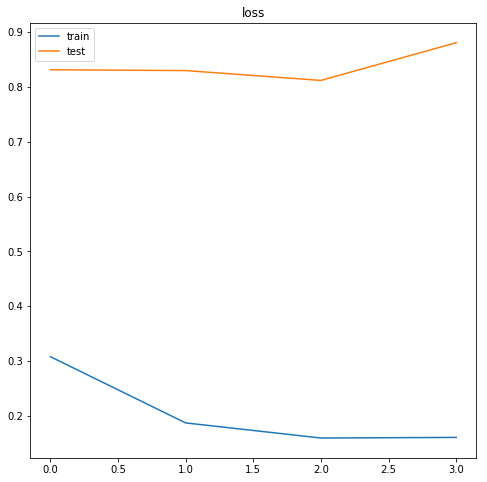

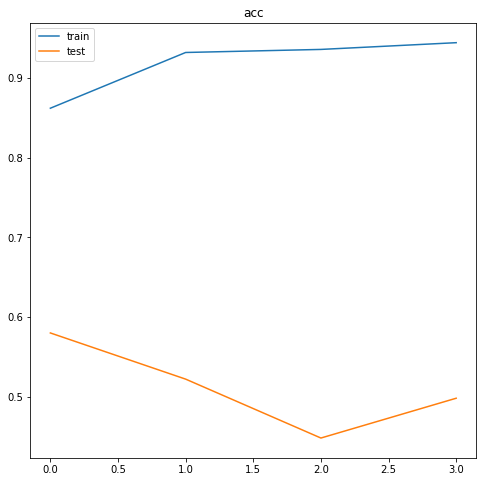





  8%|██████▍                                                                         | 4/50 [17:52<3:25:42, 268.31s/it]

epoch 4, train loss 0.13, train acc 0.95, test loss 0.90, test acc 0.50


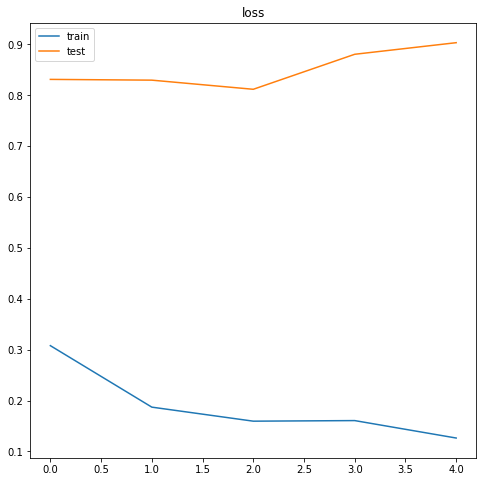

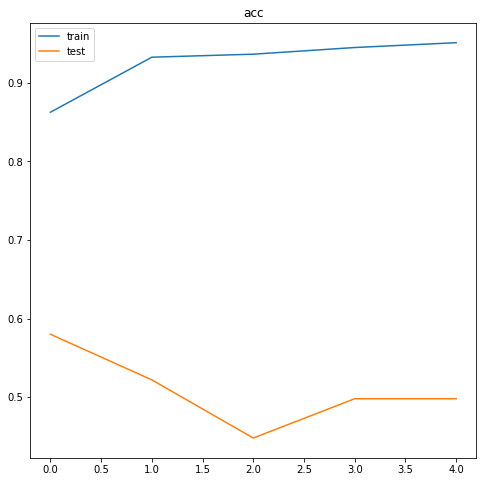





 10%|████████                                                                        | 5/50 [22:21<3:21:34, 268.77s/it]

epoch 5, train loss 0.17, train acc 0.94, test loss 0.75, test acc 0.45


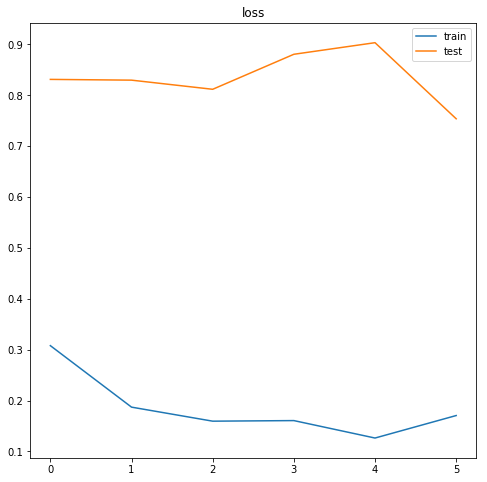

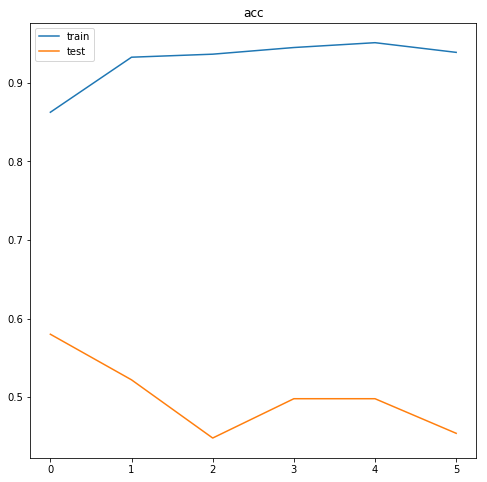





 12%|█████████▌                                                                      | 6/50 [26:53<3:17:41, 269.57s/it]

epoch 6, train loss 0.14, train acc 0.95, test loss 0.82, test acc 0.49


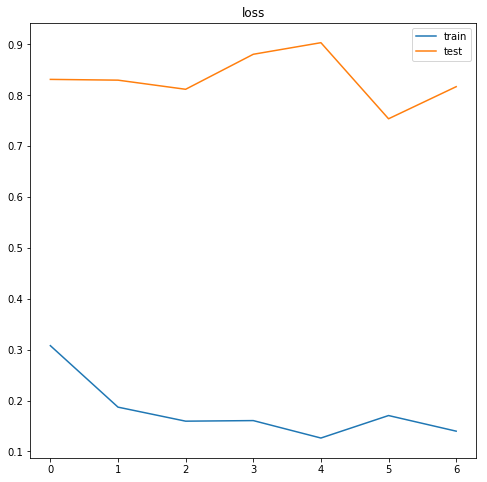

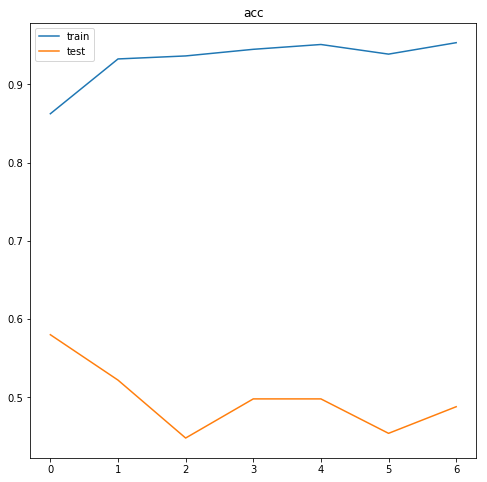





 14%|███████████▏                                                                    | 7/50 [31:23<3:13:18, 269.73s/it]

epoch 7, train loss 0.11, train acc 0.96, test loss 0.82, test acc 0.60


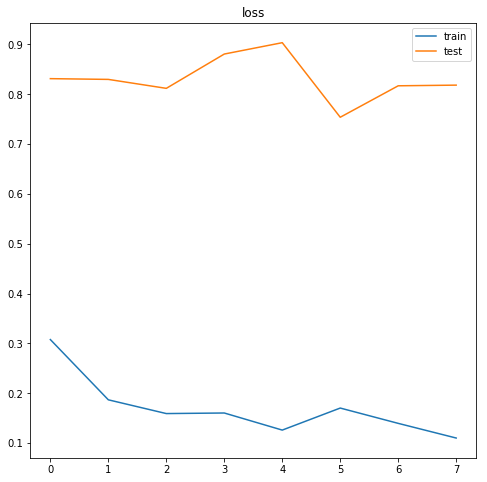

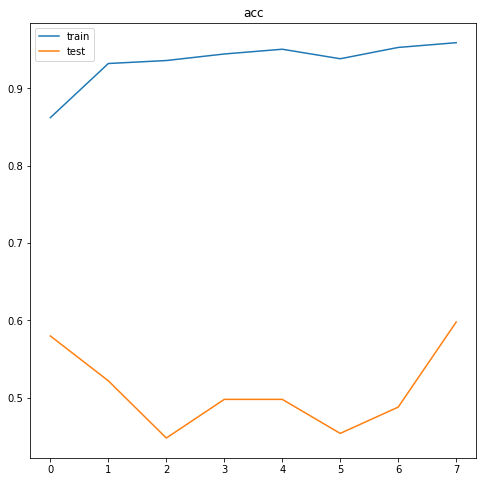





 16%|████████████▊                                                                   | 8/50 [36:46<3:20:01, 285.75s/it]

epoch 8, train loss 0.15, train acc 0.94, test loss 0.86, test acc 0.53


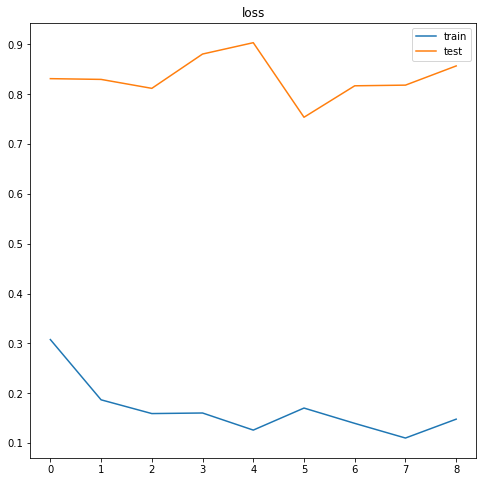

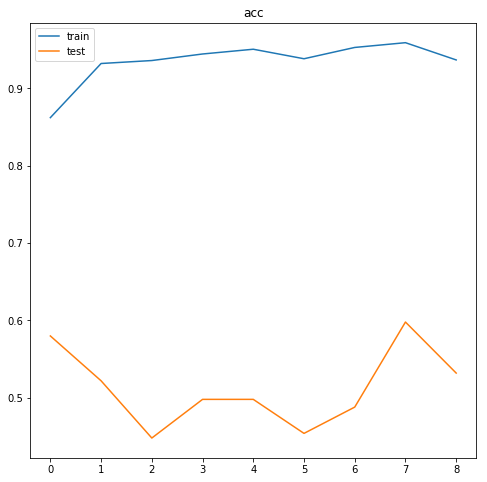





 18%|██████████████▍                                                                 | 9/50 [42:00<3:21:07, 294.32s/it]

epoch 9, train loss 0.13, train acc 0.95, test loss 0.83, test acc 0.57


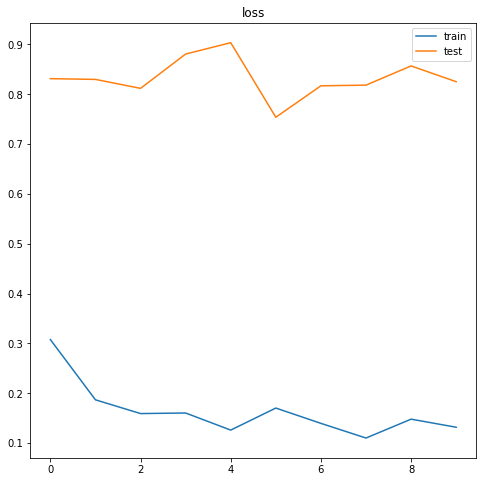

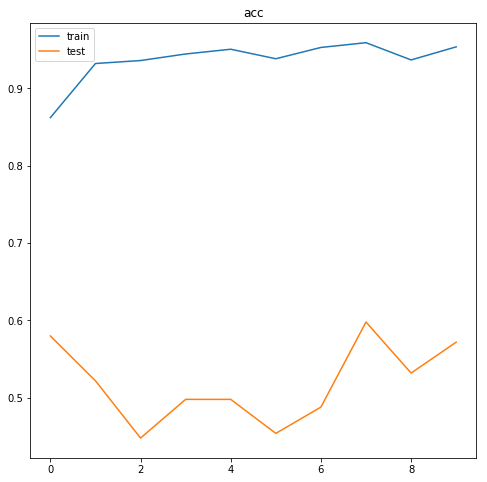





 20%|███████████████▊                                                               | 10/50 [47:58<3:28:52, 313.31s/it]

epoch 10, train loss 0.13, train acc 0.95, test loss 0.77, test acc 0.48


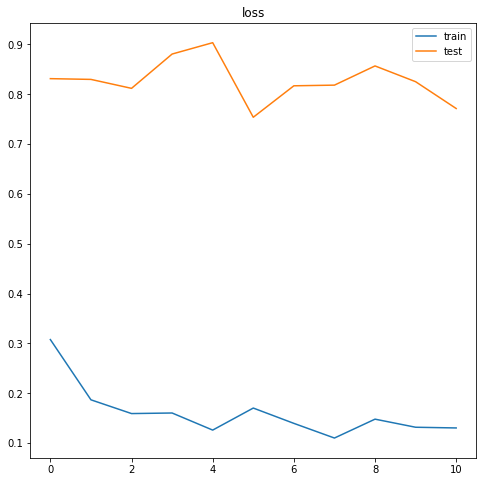

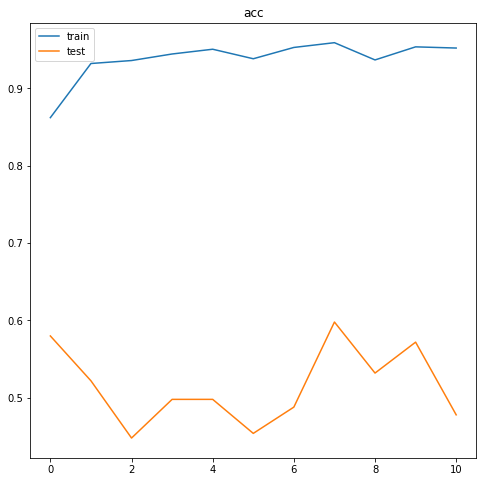





 22%|█████████████████▍                                                             | 11/50 [54:03<3:33:41, 328.75s/it]

epoch 11, train loss 0.12, train acc 0.97, test loss 0.86, test acc 0.55


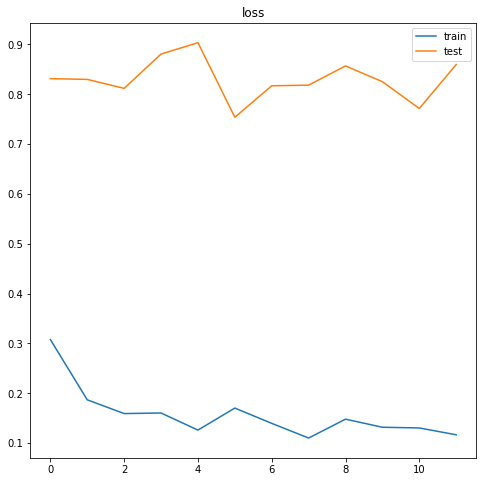

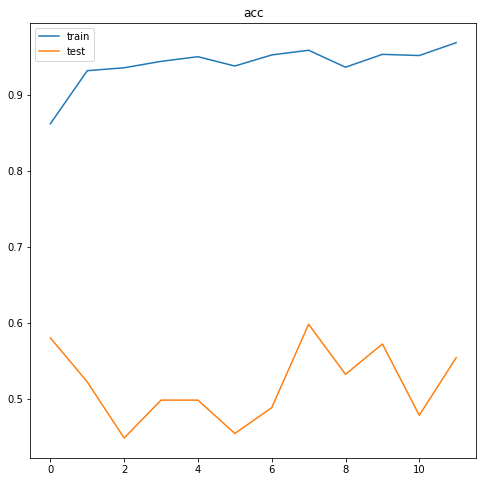





 24%|██████████████████▉                                                            | 12/50 [58:34<3:17:16, 311.48s/it]

epoch 12, train loss 0.16, train acc 0.94, test loss 0.85, test acc 0.70


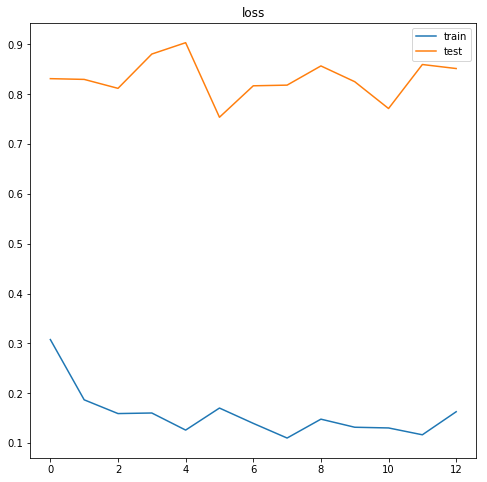

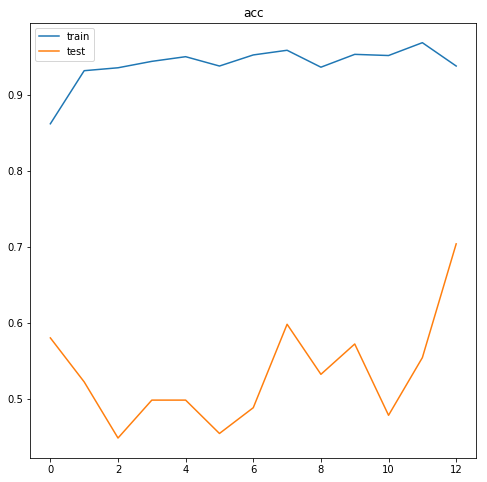





 26%|████████████████████                                                         | 13/50 [1:03:06<3:04:46, 299.65s/it]

epoch 13, train loss 0.12, train acc 0.96, test loss 0.83, test acc 0.62


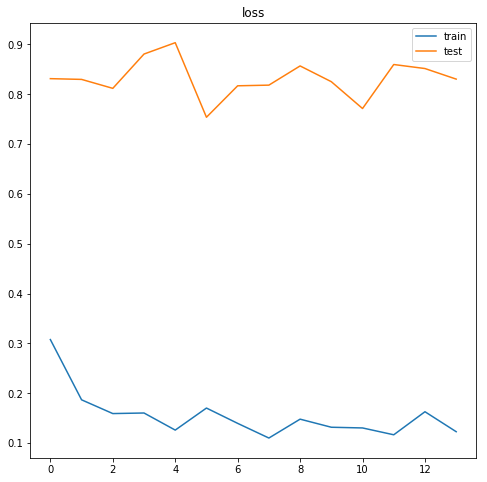

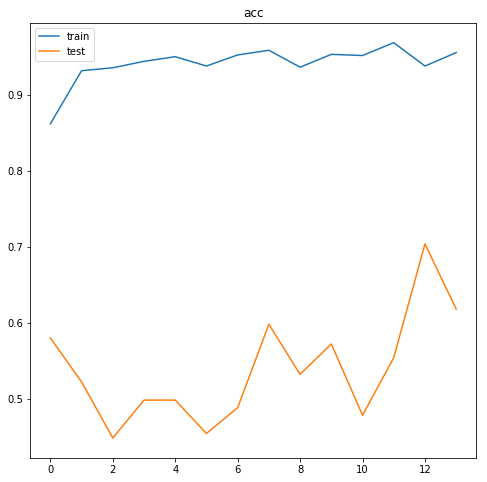





 28%|█████████████████████▌                                                       | 14/50 [1:07:40<2:55:05, 291.82s/it]

epoch 14, train loss 0.11, train acc 0.97, test loss 1.04, test acc 0.54


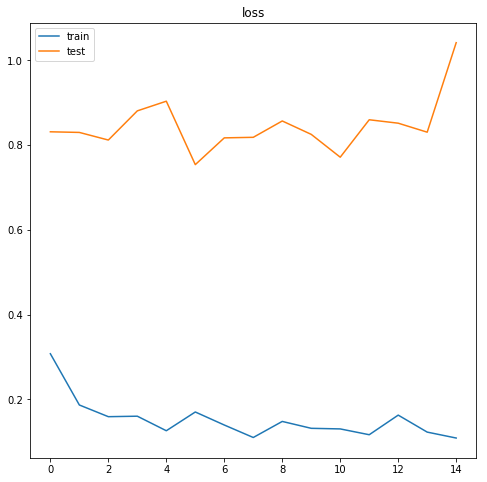

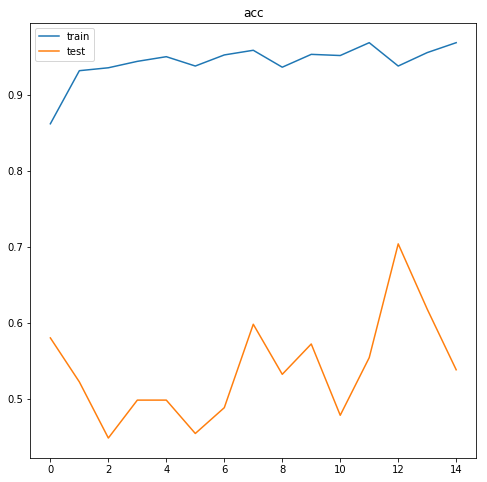





 30%|███████████████████████                                                      | 15/50 [1:12:14<2:47:15, 286.72s/it]

epoch 15, train loss 0.09, train acc 0.97, test loss 0.98, test acc 0.53


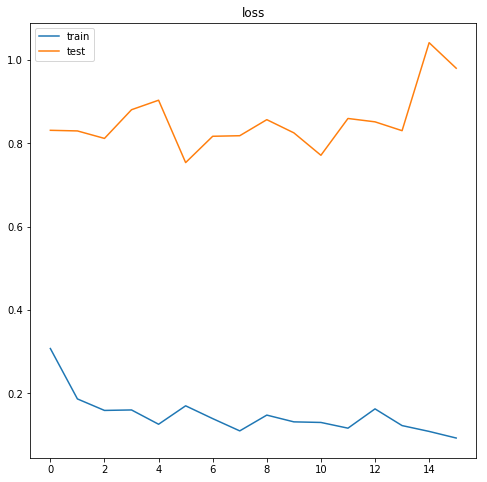

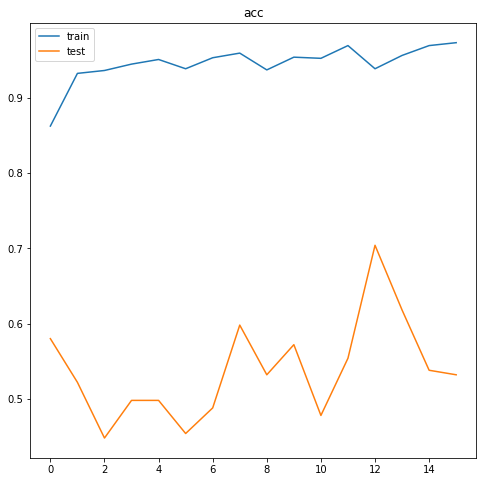





 32%|████████████████████████▋                                                    | 16/50 [1:16:48<2:40:16, 282.84s/it]

epoch 16, train loss 0.15, train acc 0.95, test loss 0.82, test acc 0.57


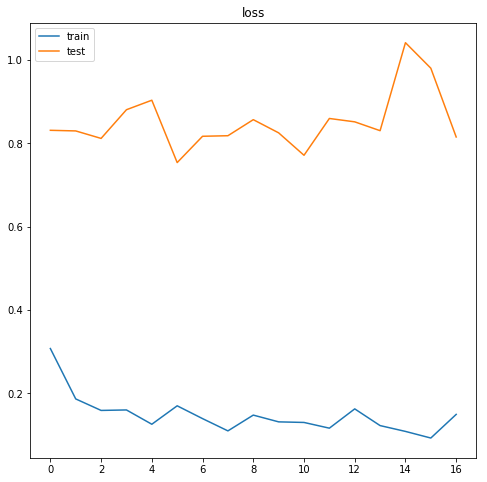

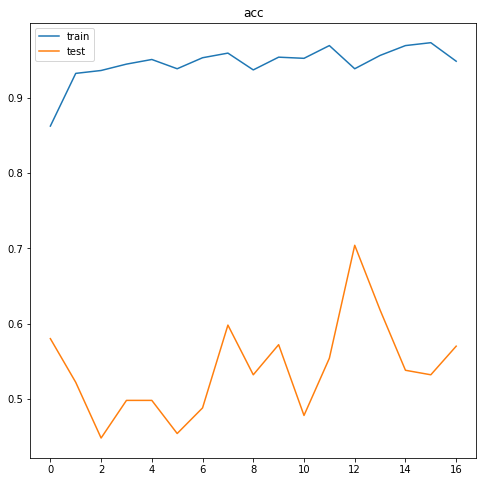





 34%|██████████████████████████▏                                                  | 17/50 [1:22:42<2:47:12, 304.00s/it]

epoch 17, train loss 0.11, train acc 0.97, test loss 0.78, test acc 0.41


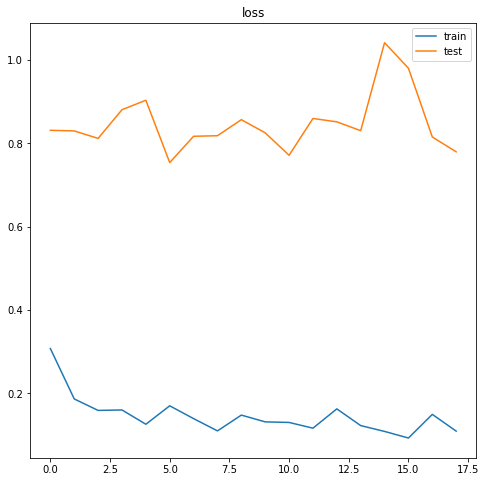

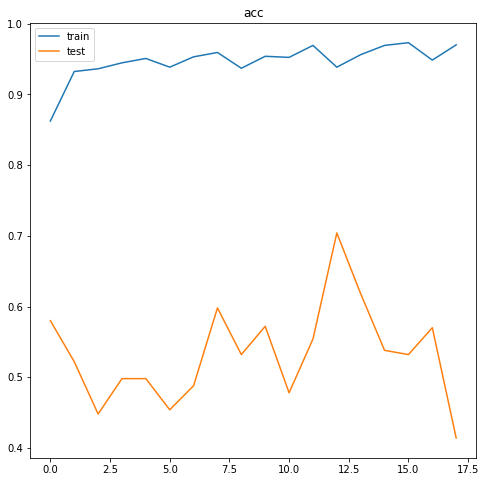





 36%|███████████████████████████▋                                                 | 18/50 [1:28:08<2:45:41, 310.66s/it]

epoch 18, train loss 0.10, train acc 0.97, test loss 0.82, test acc 0.53


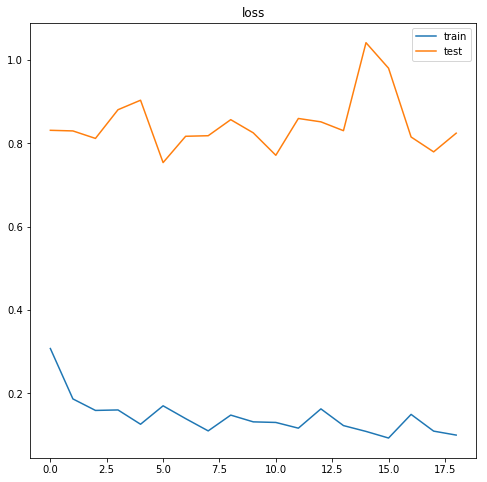

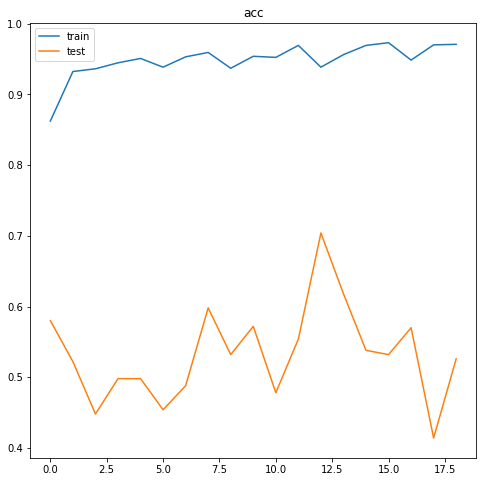





 38%|█████████████████████████████▎                                               | 19/50 [1:34:04<2:47:36, 324.41s/it]

epoch 19, train loss 0.11, train acc 0.96, test loss 0.85, test acc 0.52


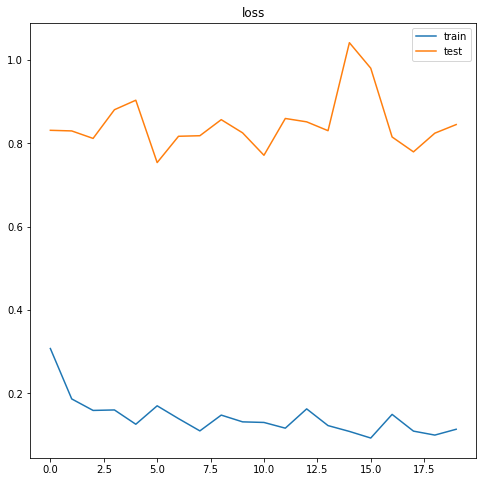

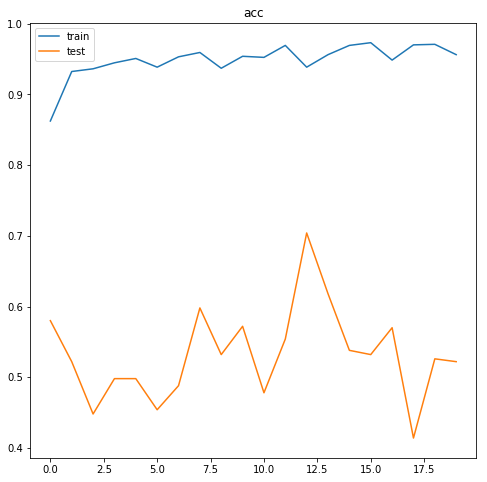





 40%|██████████████████████████████▊                                              | 20/50 [1:40:09<2:48:11, 336.38s/it]

epoch 20, train loss 0.09, train acc 0.97, test loss 0.85, test acc 0.53


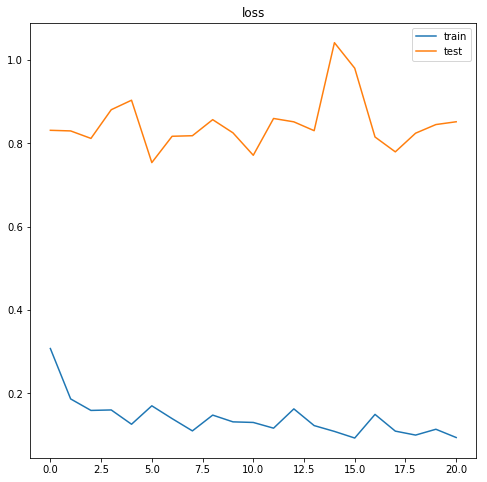

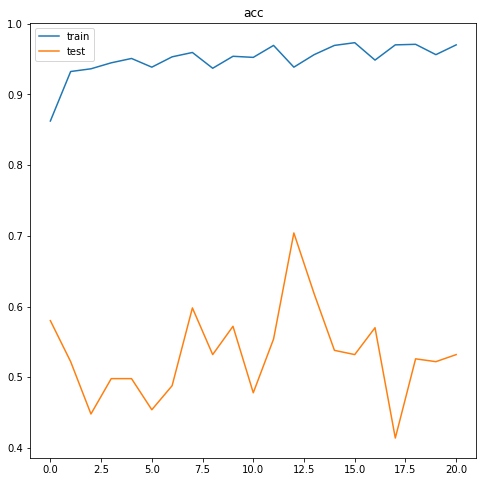





 42%|████████████████████████████████▎                                            | 21/50 [1:46:30<2:49:03, 349.78s/it]

epoch 21, train loss 0.09, train acc 0.97, test loss 0.83, test acc 0.55


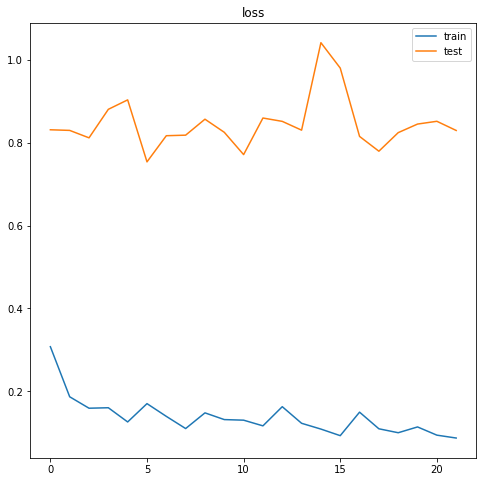

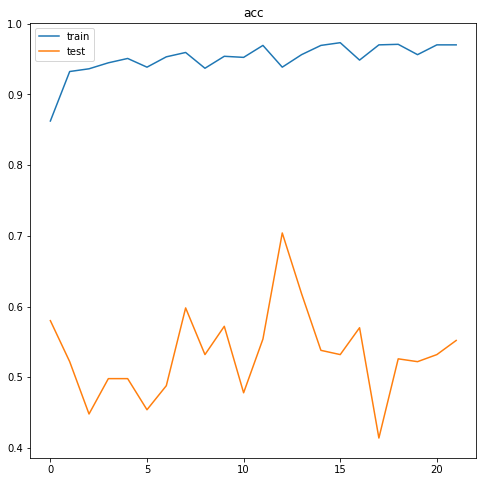





 44%|█████████████████████████████████▉                                           | 22/50 [1:53:08<2:49:59, 364.27s/it]

epoch 22, train loss 0.09, train acc 0.97, test loss 0.85, test acc 0.66


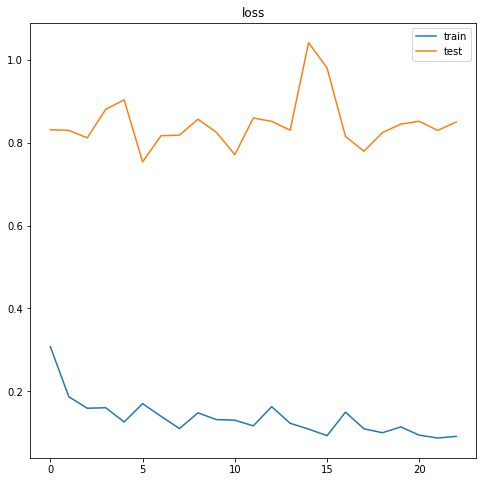

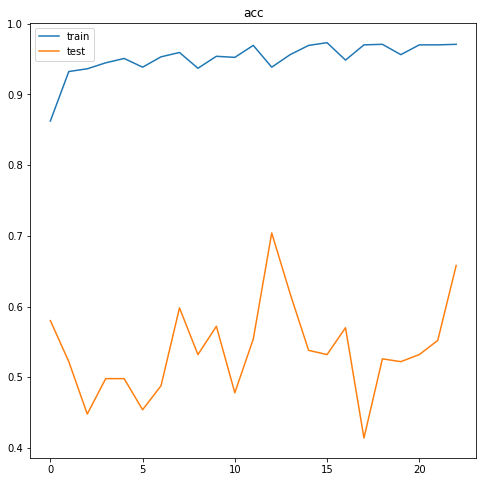





 46%|███████████████████████████████████▍                                         | 23/50 [1:58:03<2:34:37, 343.60s/it]

epoch 23, train loss 0.12, train acc 0.97, test loss 0.84, test acc 0.62


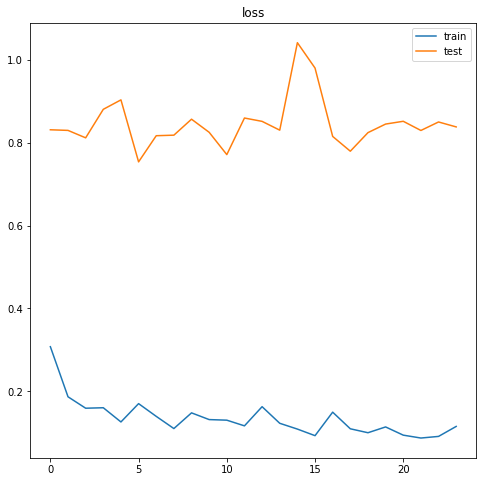

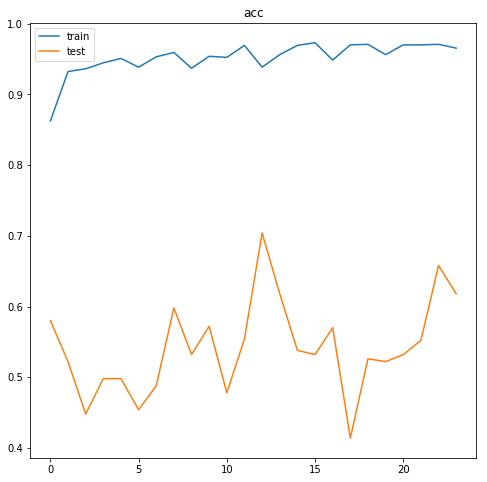





 48%|████████████████████████████████████▉                                        | 24/50 [2:02:59<2:22:38, 329.17s/it]

epoch 24, train loss 0.11, train acc 0.96, test loss 0.80, test acc 0.58


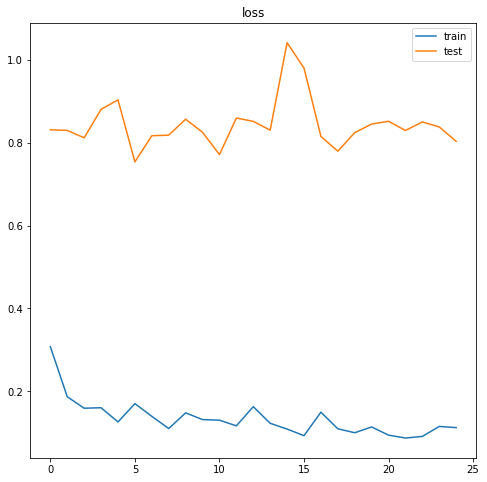

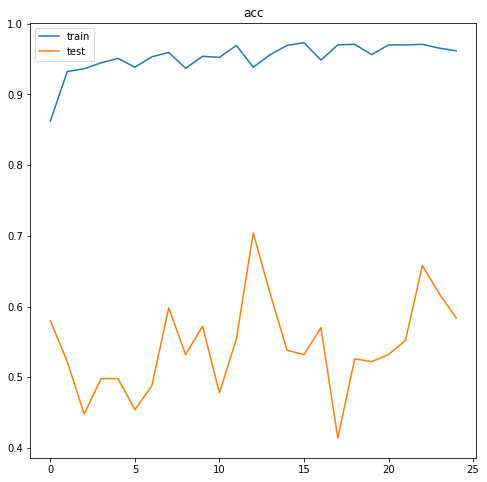





 50%|██████████████████████████████████████▌                                      | 25/50 [2:07:36<2:10:40, 313.61s/it]

epoch 25, train loss 0.08, train acc 0.98, test loss 0.96, test acc 0.66


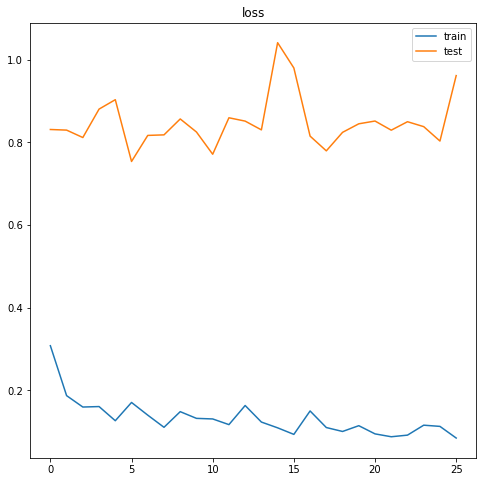

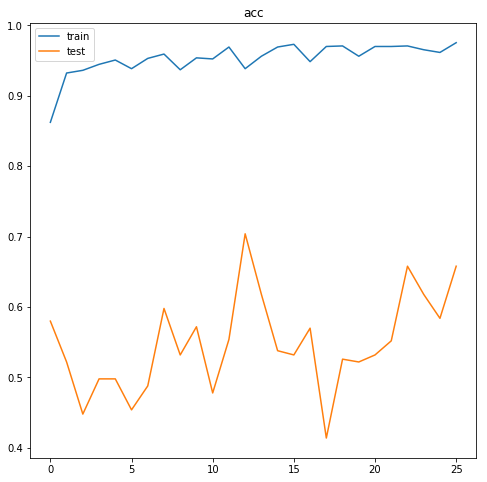





 52%|████████████████████████████████████████                                     | 26/50 [2:11:53<1:58:42, 296.75s/it]

epoch 26, train loss 0.12, train acc 0.97, test loss 0.89, test acc 0.54


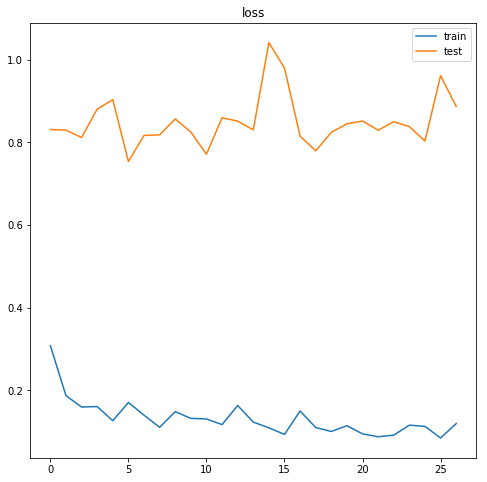

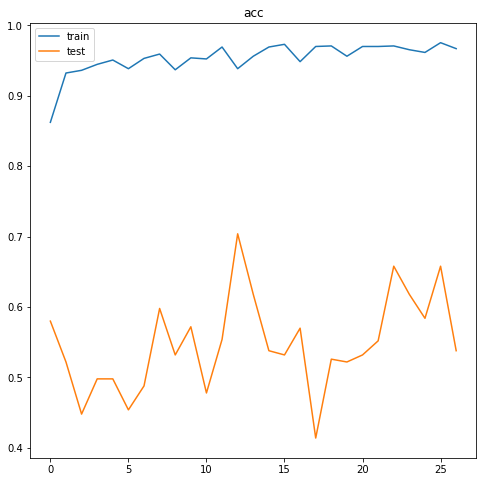





 54%|█████████████████████████████████████████▌                                   | 27/50 [2:16:13<1:49:30, 285.66s/it]

epoch 27, train loss 0.09, train acc 0.98, test loss 0.83, test acc 0.66


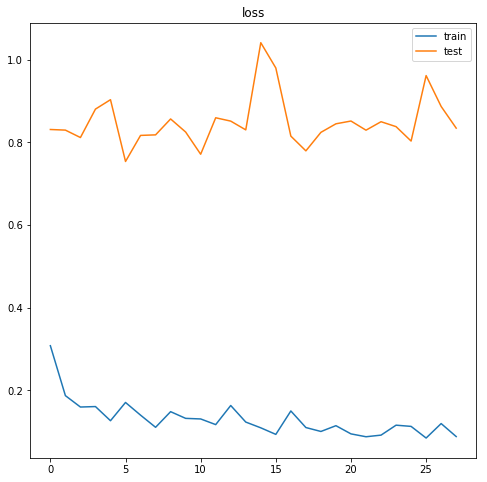

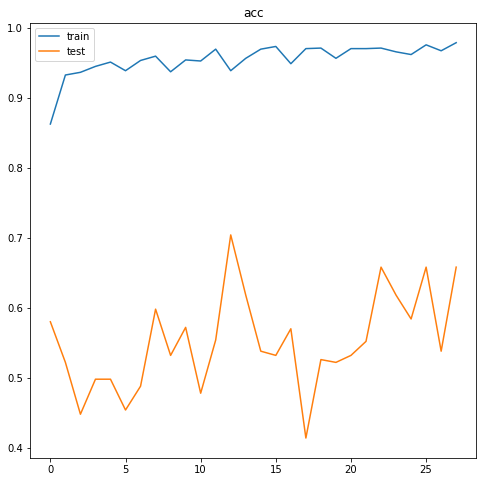





 56%|███████████████████████████████████████████                                  | 28/50 [2:20:42<1:42:57, 280.80s/it]

KeyboardInterrupt: 

In [15]:
model = torchvision.models.resnet34(pretrained=True)

## Change the last layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

opt = torch.optim.Adam(model.parameters(), lr=0.0001)



stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
for epoch in tqdm(range(50)):
    train_accs = []
    train_losses = []
    test_accs = []
    test_losses = []
    
    model.train()
    for images, labels in train_load:
        logits = model(images)
        
        train_loss = F.cross_entropy(input=logits, target=labels)
        train_acc = accuracy(labels, logits.argmax(1))
        
        train_losses.append(train_loss.data.numpy())
        train_accs.append(train_acc.data.numpy()) #подсчет accuracy по всем батчам
        
        opt.zero_grad()
        train_loss.backward()
        opt.step()
        
    train_loss = np.mean(train_losses)
    train_acc = np.mean(train_accs)
    
    model.eval()
    for images, targets in test_load:
        logits = model(images)
        
        test_loss = F.cross_entropy(input=logits, target=labels)
        test_acc = accuracy(targets, logits.argmax(1))
        
        test_losses.append(test_loss.data.numpy())
        test_accs.append(test_acc.data.numpy()) #подсчет accuracy по всем батчам
        
        opt.zero_grad()
        test_loss.backward()
        opt.step()
        
    test_loss = np.mean(test_losses)
    test_acc = np.mean(test_accs)
        
    print('epoch {}, train loss {:.2f}, train acc {:.2f}, test loss {:.2f}, test acc {:.2f}'.format(
        epoch, train_loss, train_acc, test_loss, test_acc))
 
    
    stats['train_loss'].append(train_loss)
    stats['train_acc'].append(train_acc)
    stats['test_loss'].append(test_loss)
    stats['test_acc'].append(test_acc)

    plt.plot(stats['train_loss'], label='train')
    plt.plot(stats['test_loss'], label='test')
    plt.title('loss')
    plt.legend()
    plt.show()

    plt.plot(stats['train_acc'], label='train')
    plt.plot(stats['test_acc'], label='test')
    plt.title('acc')
    plt.legend()
    plt.show()
    